In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [6]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

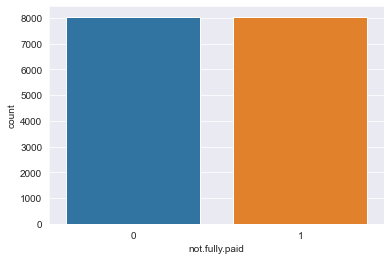

In [21]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

Text(0.5, 0, 'FICO')

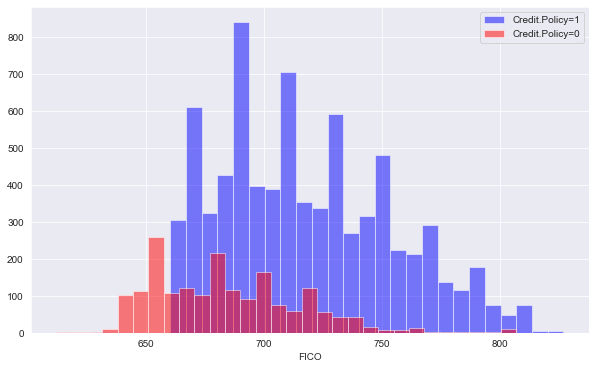

In [22]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

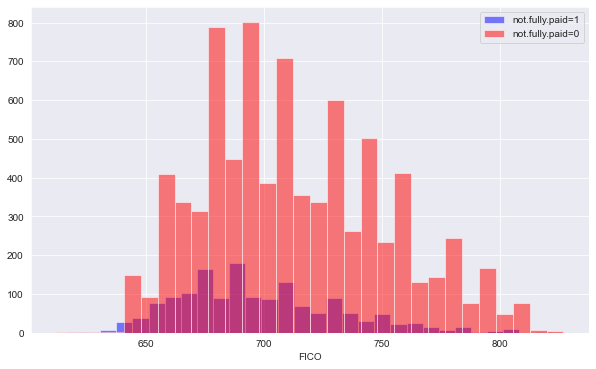

In [23]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

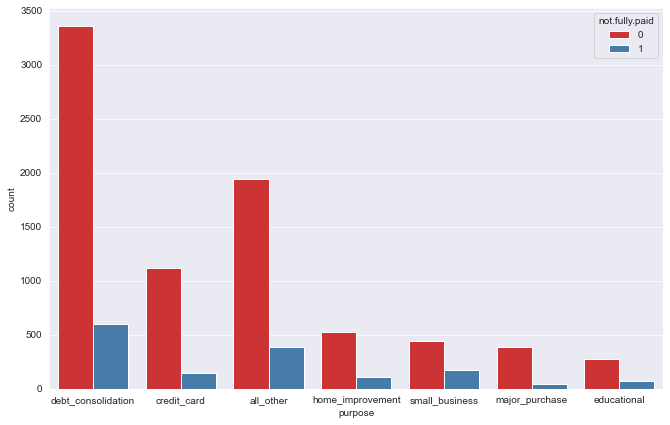

In [24]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

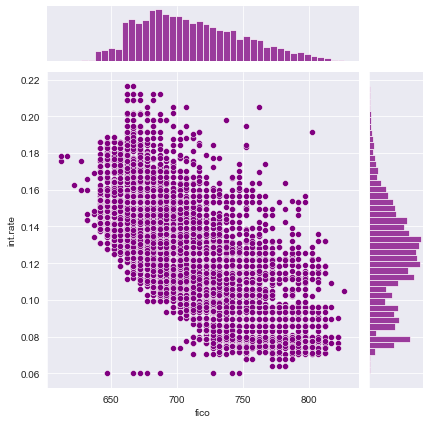

In [25]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

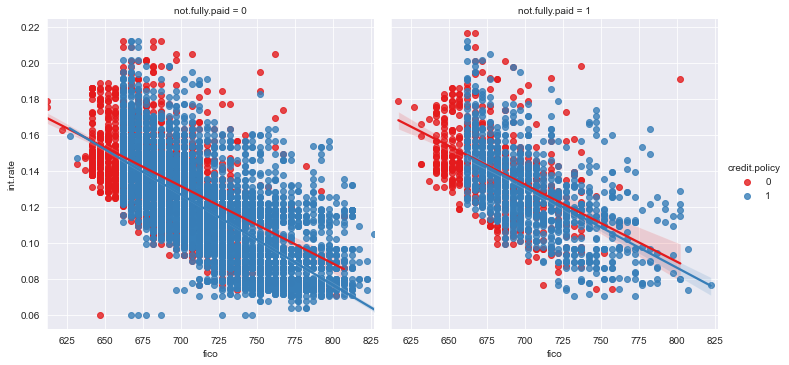

In [26]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [27]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 3650
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

<AxesSubplot:>

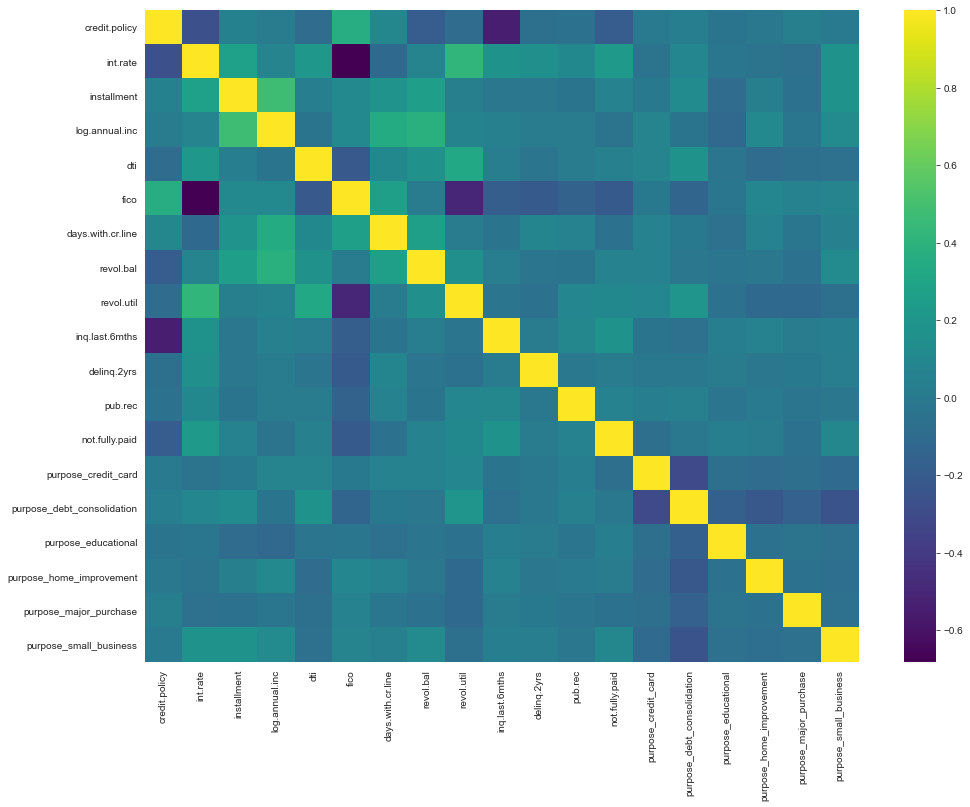

In [28]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [29]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Train on 11263 samples, validate on 4827 samples
Epoch 1/200
11263/11263 [==============================] - 1s 124us/sample - loss: 0.6870 - accuracy: 0.5443 - val_loss: 0.6811 - val_accuracy: 0.5714
Epoch 2/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6759 - accuracy: 0.6011 - val_loss: 0.6711 - val_accuracy: 0.5958
Epoch 3/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6643 - accuracy: 0.6132 - val_loss: 0.6581 - val_accuracy: 0.6045
Epoch 4/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6484 - accuracy: 0.6244 - val_loss: 0.6496 - val_accuracy: 0.6101
Epoch 5/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6424 - accuracy: 0.6215 - val_loss: 0.6474 - val_accuracy: 0.6207
Epoch 6/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6397 - accuracy: 0.6256 - val_loss: 0.6438 - val_accuracy: 0.6176
Epoch 7/200
11263/11263 [=============================

11263/11263 [==============================] - 0s 9us/sample - loss: 0.6120 - accuracy: 0.6571 - val_loss: 0.6279 - val_accuracy: 0.6420
Epoch 56/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6134 - accuracy: 0.6525 - val_loss: 0.6303 - val_accuracy: 0.6348
Epoch 57/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6113 - accuracy: 0.6587 - val_loss: 0.6267 - val_accuracy: 0.6404
Epoch 58/200
11263/11263 [==============================] - 0s 8us/sample - loss: 0.6114 - accuracy: 0.6562 - val_loss: 0.6280 - val_accuracy: 0.6420
Epoch 59/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6112 - accuracy: 0.6563 - val_loss: 0.6286 - val_accuracy: 0.6420
Epoch 60/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6107 - accuracy: 0.6575 - val_loss: 0.6285 - val_accuracy: 0.6404
Epoch 61/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6118 - accuracy: 0.6554 - val

11263/11263 [==============================] - 0s 10us/sample - loss: 0.5972 - accuracy: 0.6733 - val_loss: 0.6247 - val_accuracy: 0.6455
Epoch 110/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.5991 - accuracy: 0.6685 - val_loss: 0.6208 - val_accuracy: 0.6441
Epoch 111/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.5973 - accuracy: 0.6716 - val_loss: 0.6218 - val_accuracy: 0.6459
Epoch 112/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.5961 - accuracy: 0.6719 - val_loss: 0.6216 - val_accuracy: 0.6505
Epoch 113/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.5953 - accuracy: 0.6712 - val_loss: 0.6208 - val_accuracy: 0.6453
Epoch 114/200
11263/11263 [==============================] - 0s 14us/sample - loss: 0.5959 - accuracy: 0.6699 - val_loss: 0.6203 - val_accuracy: 0.6528
Epoch 115/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.5959 - accuracy: 

11263/11263 [==============================] - 0s 10us/sample - loss: 0.5869 - accuracy: 0.6824 - val_loss: 0.6178 - val_accuracy: 0.6513
Epoch 164/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.5867 - accuracy: 0.6816 - val_loss: 0.6169 - val_accuracy: 0.6536
Epoch 165/200
11263/11263 [==============================] - 0s 8us/sample - loss: 0.5863 - accuracy: 0.6801 - val_loss: 0.6182 - val_accuracy: 0.6501
Epoch 166/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.5870 - accuracy: 0.6791 - val_loss: 0.6180 - val_accuracy: 0.6542
Epoch 167/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.5866 - accuracy: 0.6782 - val_loss: 0.6175 - val_accuracy: 0.6520
Epoch 168/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.5865 - accuracy: 0.6805 - val_loss: 0.6189 - val_accuracy: 0.6511
Epoch 169/200
11263/11263 [==============================] - 0s 8us/sample - loss: 0.5891 - accuracy: 0.677

<AxesSubplot:>

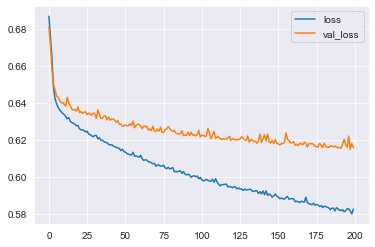

In [30]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [31]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)


[[1717  720]
 [ 957 1433]] 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      2437
           1       0.67      0.60      0.63      2390

    accuracy                           0.65      4827
   macro avg       0.65      0.65      0.65      4827
weighted avg       0.65      0.65      0.65      4827



In [33]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Train on 11263 samples, validate on 4827 samples
Epoch 1/200
11263/11263 [==============================] - 1s 74us/sample - loss: 0.6953 - binary_accuracy: 0.5108 - val_loss: 0.6903 - val_binary_accuracy: 0.5517
Epoch 2/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6887 - binary_accuracy: 0.5408 - val_loss: 0.6858 - val_binary_accuracy: 0.5917
Epoch 3/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6835 - binary_accuracy: 0.5661 - val_loss: 0.6780 - val_binary_accuracy: 0.6037
Epoch 4/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6767 - binary_accuracy: 0.5736 - val_loss: 0.6669 - val_binary_accuracy: 0.6136
Epoch 5/200
11263/11263 [==============================] - 0s 12us/sample - loss: 0.6689 - binary_accuracy: 0.5890 - val_loss: 0.6605 - val_binary_accuracy: 0.6093
Epoch 6/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6634 - binary_accuracy: 0.5956 - val_loss: 0.65

11263/11263 [==============================] - 0s 11us/sample - loss: 0.6388 - binary_accuracy: 0.6290 - val_loss: 0.6360 - val_binary_accuracy: 0.6234
Epoch 51/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6363 - binary_accuracy: 0.6308 - val_loss: 0.6363 - val_binary_accuracy: 0.6325
Epoch 52/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6375 - binary_accuracy: 0.6331 - val_loss: 0.6352 - val_binary_accuracy: 0.6298
Epoch 53/200
11263/11263 [==============================] - 0s 14us/sample - loss: 0.6399 - binary_accuracy: 0.6335 - val_loss: 0.6362 - val_binary_accuracy: 0.6296
Epoch 54/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6393 - binary_accuracy: 0.6316 - val_loss: 0.6364 - val_binary_accuracy: 0.6298
Epoch 55/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6370 - binary_accuracy: 0.6318 - val_loss: 0.6363 - val_binary_accuracy: 0.6290
Epoch 56/200
11263/1126

Epoch 100/200
11263/11263 [==============================] - 0s 14us/sample - loss: 0.6314 - binary_accuracy: 0.6435 - val_loss: 0.6291 - val_binary_accuracy: 0.6430
Epoch 101/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6277 - binary_accuracy: 0.6427 - val_loss: 0.6273 - val_binary_accuracy: 0.6410
Epoch 102/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6283 - binary_accuracy: 0.6456 - val_loss: 0.6277 - val_binary_accuracy: 0.6445
Epoch 103/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6311 - binary_accuracy: 0.6429 - val_loss: 0.6275 - val_binary_accuracy: 0.6412
Epoch 104/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6292 - binary_accuracy: 0.6498 - val_loss: 0.6280 - val_binary_accuracy: 0.6408
Epoch 105/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6297 - binary_accuracy: 0.6415 - val_loss: 0.6274 - val_binary_accuracy: 0.6449
Epoch

11263/11263 [==============================] - 0s 9us/sample - loss: 0.6256 - binary_accuracy: 0.6486 - val_loss: 0.6230 - val_binary_accuracy: 0.6484
Epoch 150/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6218 - binary_accuracy: 0.6560 - val_loss: 0.6225 - val_binary_accuracy: 0.6486
Epoch 151/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6206 - binary_accuracy: 0.6512 - val_loss: 0.6224 - val_binary_accuracy: 0.6468
Epoch 152/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6189 - binary_accuracy: 0.6523 - val_loss: 0.6224 - val_binary_accuracy: 0.6493
Epoch 153/200
11263/11263 [==============================] - 0s 9us/sample - loss: 0.6192 - binary_accuracy: 0.6564 - val_loss: 0.6221 - val_binary_accuracy: 0.6522
Epoch 154/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6205 - binary_accuracy: 0.6522 - val_loss: 0.6224 - val_binary_accuracy: 0.6484
Epoch 155/200
11263/11

11263/11263 [==============================] - 0s 10us/sample - loss: 0.6163 - binary_accuracy: 0.6614 - val_loss: 0.6178 - val_binary_accuracy: 0.6507
Epoch 199/200
11263/11263 [==============================] - 0s 10us/sample - loss: 0.6149 - binary_accuracy: 0.6601 - val_loss: 0.6176 - val_binary_accuracy: 0.6486
Epoch 200/200
11263/11263 [==============================] - 0s 11us/sample - loss: 0.6175 - binary_accuracy: 0.6551 - val_loss: 0.6181 - val_binary_accuracy: 0.6499


<AxesSubplot:>

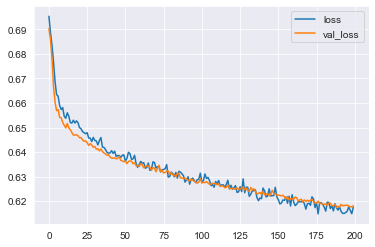

In [34]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [35]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[ 258 2179]
 [  27 2363]] 
               precision    recall  f1-score   support

           0       0.91      0.11      0.19      2437
           1       0.52      0.99      0.68      2390

    accuracy                           0.54      4827
   macro avg       0.71      0.55      0.44      4827
weighted avg       0.71      0.54      0.43      4827

